In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### pobieramy potrzebne biblioteki

### autorzy: Adrian Bloch i Witold Jagiełło

In [2]:
columns = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]

### nazwy kolumn w pliku

In [3]:
banknote = pd.read_csv('data/data_banknote_authentication.txt', names=columns)

### importujemy dane i wskazujemy nazwę, która jest równa wcześniej podanym nazwom kolumn

In [4]:
print(banknote.head(5))

   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


### wypisujemy pierwszą piątkę

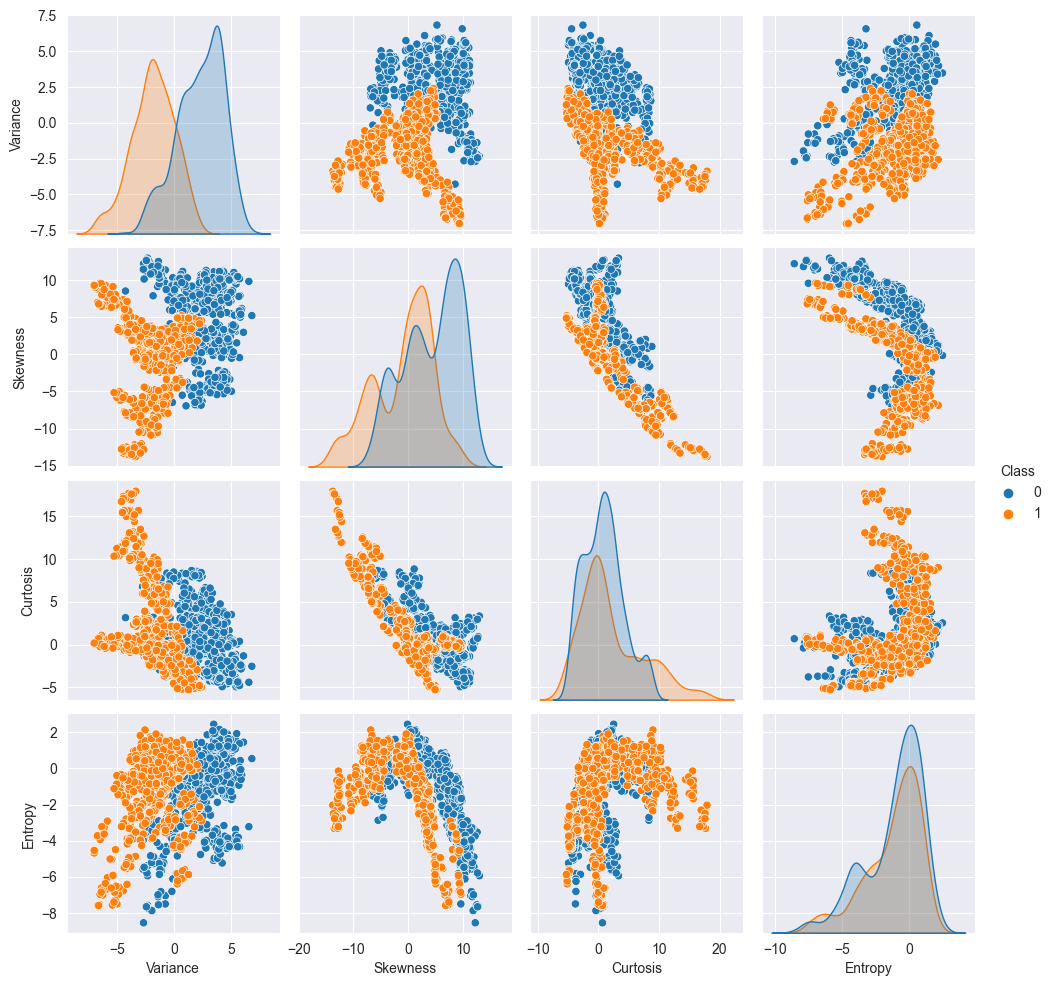

In [5]:
sns.pairplot(banknote, hue='Class')
plt.show()

### tworzymy oraz wyświetlamy wykresy

In [6]:
x, y = banknote.drop('Class', axis=1), banknote['Class']

### z wykresu wyłączamy kolumnę "Class"

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
print("x train shape ", x_train.shape)
print("x test shape ", x_test.shape)

x train shape  (1097, 4)
x test shape  (275, 4)


### inicjujemy dane testowe oraz treningowe, wskazujemy, że dane testowe mają być wielkości 20% oraz wypisujemy ile jest danych testowych i treningowych

In [8]:
linear_svc_classifier = SVC(kernel="linear")
linear_svc_classifier.fit(x_train, y_train)
linear_svc_classifier_prediction = linear_svc_classifier.predict(x_test)

### określamy svc oraz obliczamy przewidywany wynik

In [9]:
print(confusion_matrix(y_test, linear_svc_classifier_prediction))
print(classification_report(y_test, linear_svc_classifier_prediction))
print("accuracy of linear svm", accuracy_score(y_test, linear_svc_classifier_prediction) * 100, "%")

[[144   3]
 [  0 128]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       147
           1       0.98      1.00      0.99       128

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

accuracy of linear svm 98.9090909090909 %


### wypisujemy ocenę jak algorytm sobie poradził oraz wyświetlamy te wartość w procentach